In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img0 = cv2.imread('../data/Lena.png', cv2.IMREAD_GRAYSCALE)
img1 = cv2.imread('../data/Lena_rotated.png', cv2.IMREAD_GRAYSCALE)

detector = cv2.ORB_create(100)
kps0, fea0 = detector.detectAndCompute(img0, None)
kps1, fea1 = detector.detectAndCompute(img1, None)
matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING, False)
matches = matcher.match(fea0, fea1)

In [3]:
pts0 = np.float32([kps0[m.queryIdx].pt for m in matches]).reshape(-1,2)
pts1 = np.float32([kps1[m.trainIdx].pt for m in matches]).reshape(-1,2)
H, mask = cv2.findHomography(pts0, pts1, cv2.RANSAC, 3.0)

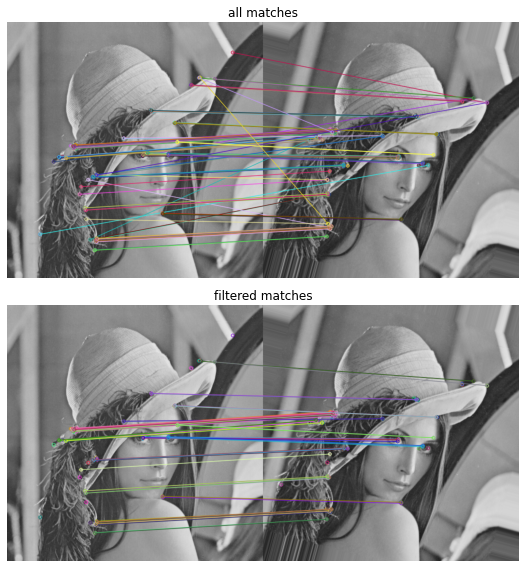

In [4]:
plt.figure(figsize=(10, 8))
plt.subplot(211)
plt.axis('off')
plt.title('all matches')
dbg_img = cv2.drawMatches(img0, kps0, img1, kps1, matches, None)
plt.imshow(dbg_img[:,:,[2,1,0]])
plt.subplot(212)
plt.axis('off')
plt.title('filtered matches')
dbg_img = cv2.drawMatches(img0, kps0, img1, kps1, [m for i,m in enumerate(matches) if mask[i]], None)
plt.imshow(dbg_img[:,:,[2,1,0]])
plt.tight_layout()
plt.show()